**Perform Support Vector Machines (SVM) and K-Nearest Neighbors (KNN) classification, and evaluate the models.**
- Dataset : iris.csv
- Model : SVM and KNN Classifier


In [40]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [41]:
# Load data
data = pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
# Null Values
data.isna().sum()/data.shape[0]

,0
sepal_length,0.0
sepal_width,0.0
petal_length,0.0
petal_width,0.0
species,0.0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [44]:
#  Summary Statistics
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
# Backup data
df= data.copy()

In [46]:
# Duplicate Values
df.duplicated().sum()


np.int64(3)

In [47]:
df.drop_duplicates(inplace= True)
df.duplicated().sum()

np.int64(0)

In [48]:
df["species"].value_counts()

,count
species,
versicolor,50
virginica,49
setosa,48


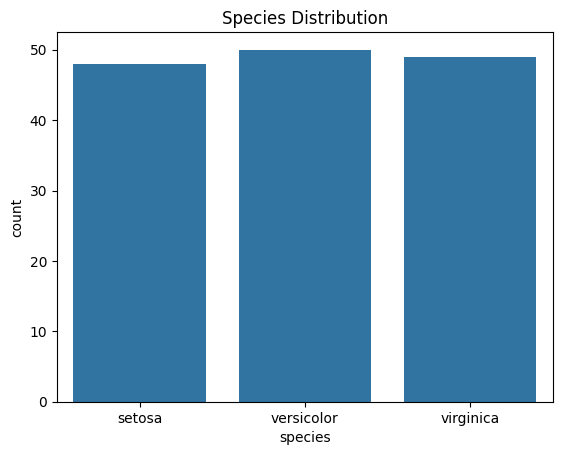

In [49]:
# Class Distribution Visualization
sns.countplot(x='species', data=df)
plt.title("Species Distribution")
plt.show()

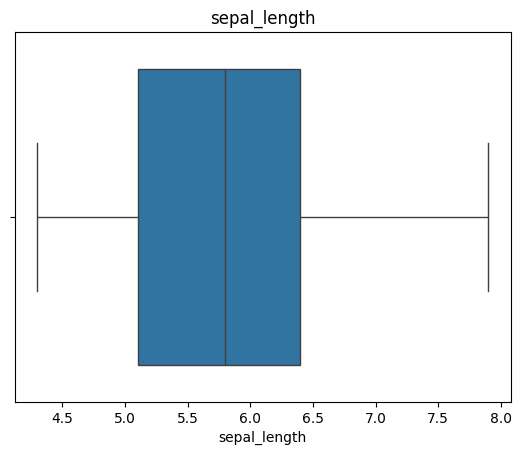

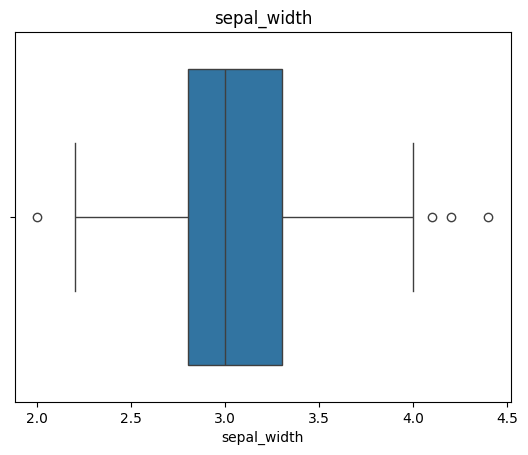

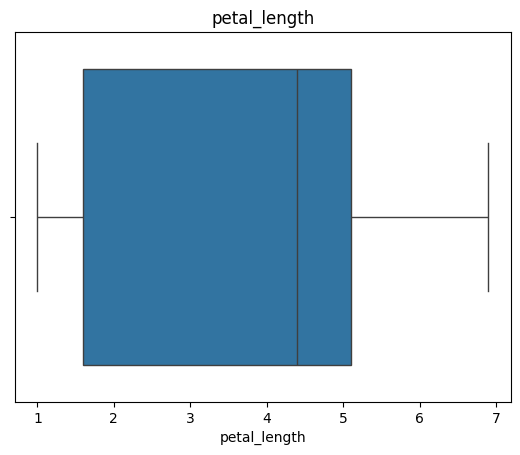

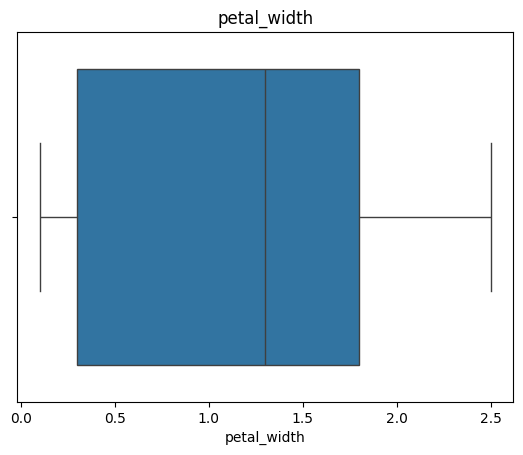

In [50]:
# Feature Distribution
for col in df.columns[:-1]:
    sns.boxplot(x=df[col])
    plt.title(col)
    plt.show()

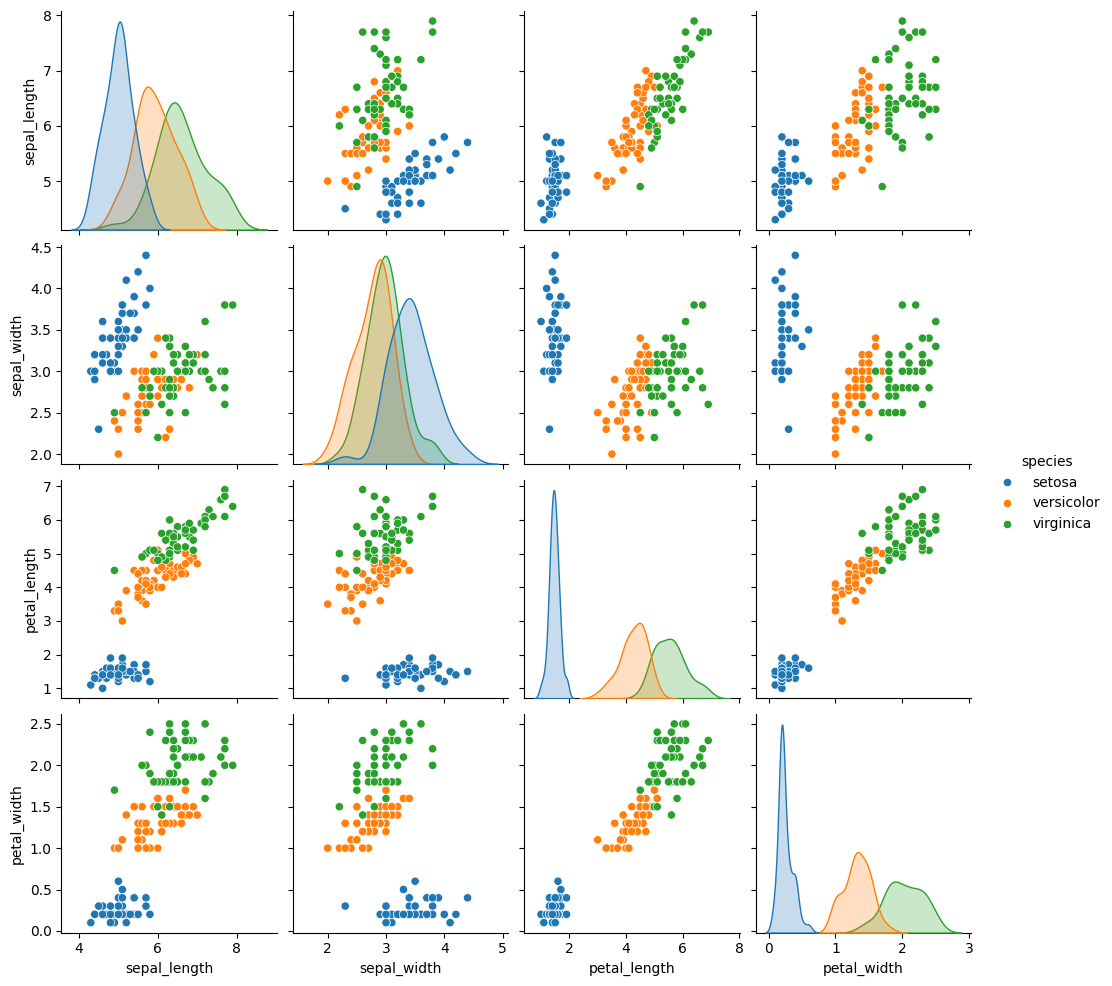

In [51]:
# Pairplot Analysis
sns.pairplot(df, hue="species")
plt.show()

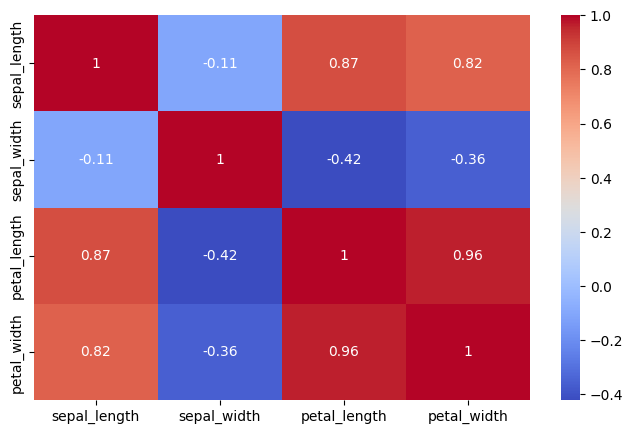

In [52]:
# Co-relation analysis
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

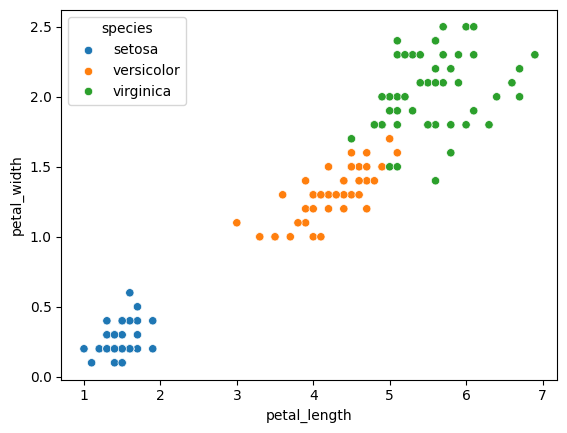

In [53]:
# Scatter Plot Analysis
sns.scatterplot(
    x="petal_length",
    y="petal_width",
    hue="species",
    data=df
)
plt.show()

In [54]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [55]:
# Separate the dataset into feature data (X) and target labels (y)
X= df.drop("species", axis=1)
y= df["species"]

In [56]:
# Encode target labels to numerical values
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
y = df["species"]
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [57]:
 # Transform data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

# Initialize StandardScaler for preprocessing
preprocessor = StandardScaler()

# Processes data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## SVM Model

In [58]:
# Model initialization and training
model = SVC(kernel = "linear", C = 1)
model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [59]:
# prediction
y_pred = model.predict(X_test)
df_predict = pd.DataFrame({"Actual": y_test, "Prediction": y_pred})
df_predict.head()

,Actual,Prediction
127,2,2
53,1,1
140,2,2
19,0,0
106,2,2


In [60]:
# Calculate and print the accuracy for the SVM model
acc = metrics.accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {acc*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

SVM Model Accuracy: 96.67%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


## Hyperparameter Tuning

In [61]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Estimator Score:", grid.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

In [62]:
# Prediction and accuracy with best model
best_model = grid.best_estimator_
y_pred_grid = best_model.predict(X_test)
acc_grid = metrics.accuracy_score(y_test, y_pred_grid)
print(f"Model Accuracy after Hyperparameter tuning: {acc_grid*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_grid))


Model Accuracy after Hyperparameter tuning: 96.67%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  0  9]]


## KNN Model

In [63]:
# Model Initialization and training
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [64]:
y_pred_knn = model_knn.predict(X_test)
df_predict_knn = pd.DataFrame({"Actual": y_test, "Prediction": y_pred_knn})
df_predict_knn.head()

,Actual,Prediction
127,2,2
53,1,1
140,2,2
19,0,0
106,2,1


In [65]:
# Accuracy
acc_knn = metrics.accuracy_score(y_test, y_pred_knn)
print(f"KNN Model Accuracy: {acc_knn*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

KNN Model Accuracy: 93.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


## Hyperparameter Tuning

In [66]:
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=2, cv=5)
grid_knn.fit(X_train, y_train)
print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best Estimator Score for KNN:", grid_knn.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................n_neighbors=7; total time=   0.0s
[CV] END ......................................n_

In [67]:
# Prediction and accuracy with best model
best_knn_model = grid_knn.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test)

acc_knn_tuned = metrics.accuracy_score(y_test, y_pred_knn_tuned)
print(f"KNN Model Accuracy after Hyperparameter tuning: {acc_knn_tuned*100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn_tuned))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn_tuned))

KNN Model Accuracy after Hyperparameter tuning: 93.33%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


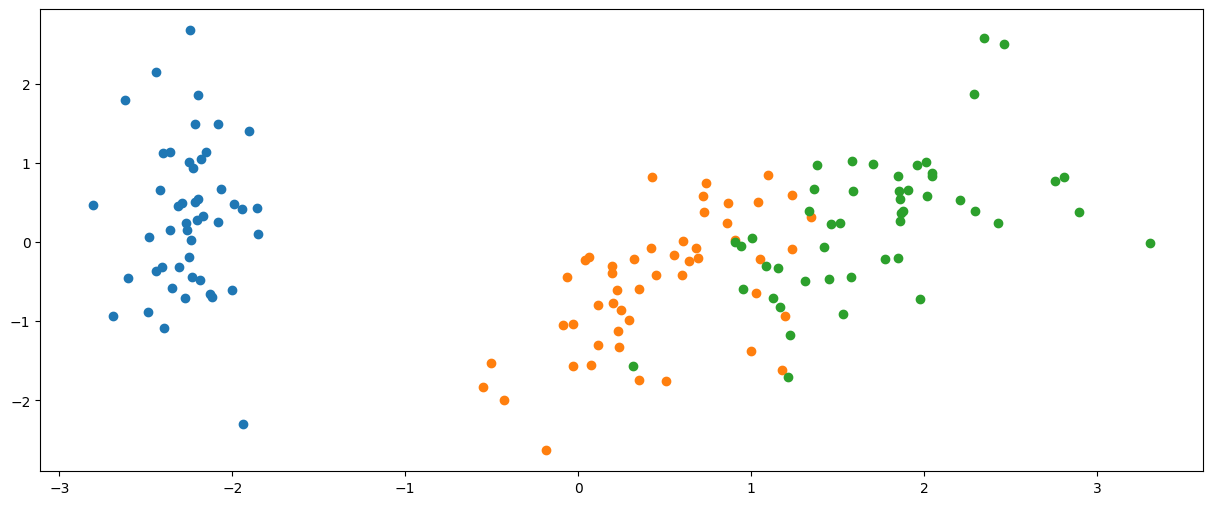

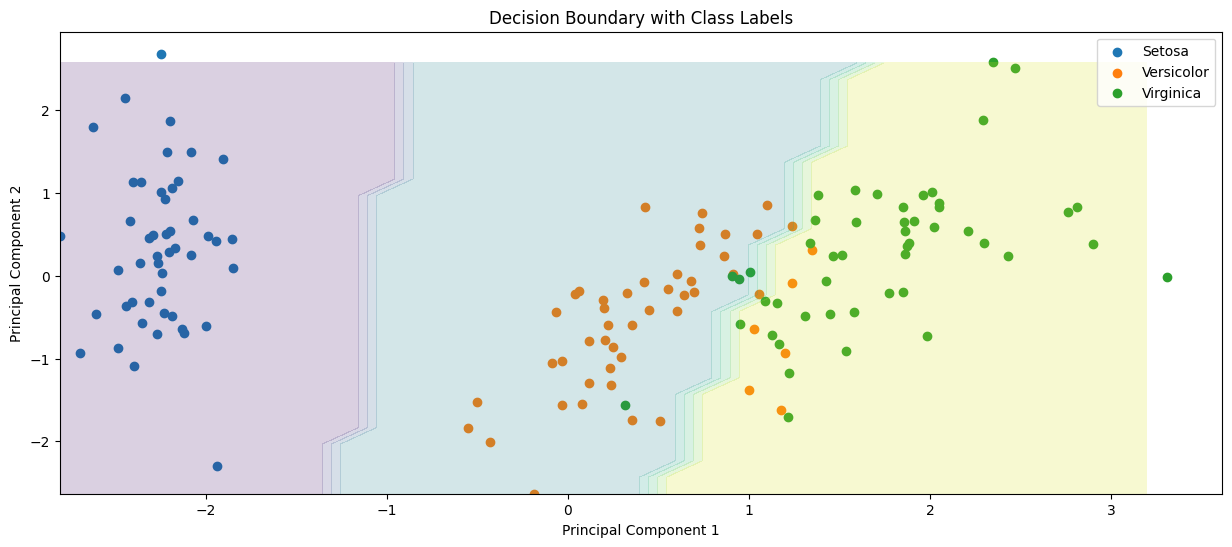

In [68]:
# Visualize the class distribution and decision boundary

plt.figure(figsize=(15,6))
# PCA components
X = X_pca[:, 0]
Y = X_pca[:, 1]

# Plot each class separately with labels
plt.scatter(X[y==0], Y[y==0], label="Setosa")
plt.scatter(X[y==1], Y[y==1], label="Versicolor")
plt.scatter(X[y==2], Y[y==2], label="Virginica")

# Visualize the class distribution and decision boundary
plt.figure(figsize=(15,6))

# PCA components
X = X_pca[:, 0]
Y = X_pca[:, 1]

# Plot each class separately with labels
plt.scatter(X[y==0], Y[y==0], label="Setosa")
plt.scatter(X[y==1], Y[y==1], label="Versicolor")
plt.scatter(X[y==2], Y[y==2], label="Virginica")

# Decision boundary
X_min, X_max = X.min(), X.max()
Y_min, Y_max = Y.min(), Y.max()
h = 0.2

XX, YY = np.meshgrid(np.arange(X_min, X_max, h),
                     np.arange(Y_min, Y_max, h))

Z = model.predict(pca.inverse_transform(
    np.c_[XX.ravel(), YY.ravel()]
))

Z = Z.reshape(XX.shape)

plt.contourf(XX, YY, Z, alpha=0.2)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundary with Class Labels")
plt.legend()
plt.show()


## Key Takeways :-
- SVM outperformed KNN on the test set.

- Linear kernel works extremely well for Iris dataset.

- The dataset is linearly separable (especially Setosa class).

- Hyperparameter tuning did not significantly improve test performance.

- SVM is more stable and generalizes slightly better than KNN in this case.